In [1]:
!pip install flask

In [2]:
!pip install -U flask-cors

Requirement already up-to-date: flask-cors in c:\users\smhrd\anaconda3\lib\site-packages (3.0.10)


In [3]:
import pickle # 데이터 저장/로딩을 위한 모듈
import flask
from flask_cors import CORS
from flask import Flask, redirect, request, Response
from flask import jsonify
from flask import make_response

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # train, test로 나눠주고 셔플해주는 라이브러리
from sklearn import metrics # 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from datetime import datetime

(3745, 18)
(883, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3745 entries, 1 to 3745
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   화재발생년월일    3745 non-null   object
 1   시도         3745 non-null   object
 2   시군구        3745 non-null   object
 3   읍면동        3745 non-null   object
 4   화재유형       3745 non-null   object
 5   발화열원       3745 non-null   object
 6   발화열원소분류    3745 non-null   object
 7   발화요인대분류    3745 non-null   object
 8   발화요인소분류    3745 non-null   object
 9   최초착화물대분류   3745 non-null   object
 10  최초착화물소분류   3745 non-null   object
 11  인명피해(명)소계  3745 non-null   int64 
 12  사망         3745 non-null   int64 
 13  부상         3745 non-null   int64 
 14  재산피해소계     3745 non-null   int64 
 15  장소대분류      3745 non-null   object
 16  장소중분류      3745 non-null   object
 17  장소소분류      3745 non-null   object
dtypes: int64(4), object(14)
memory usage: 555.9+ KB
<class 'pandas.core.frame.DataFrame'>
I

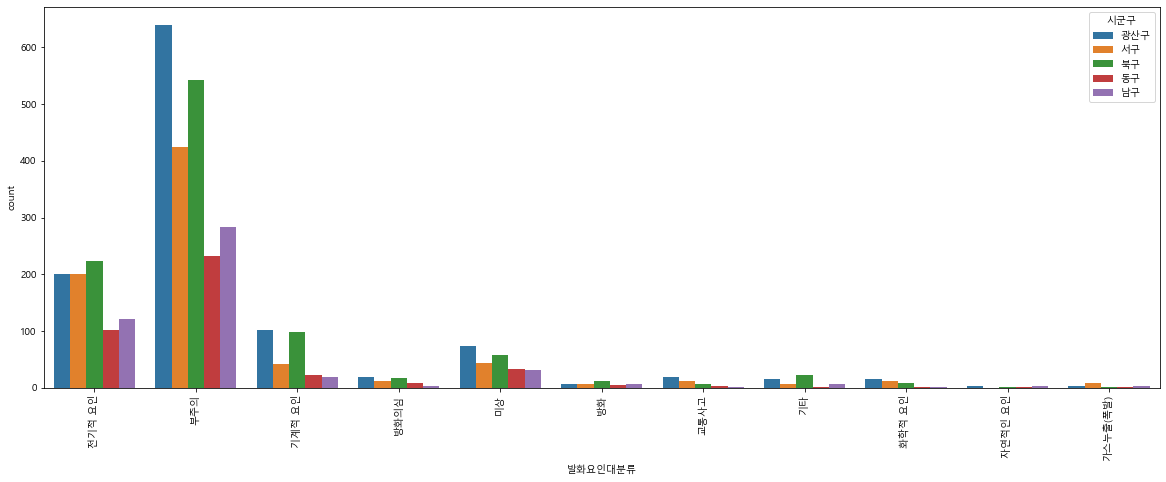

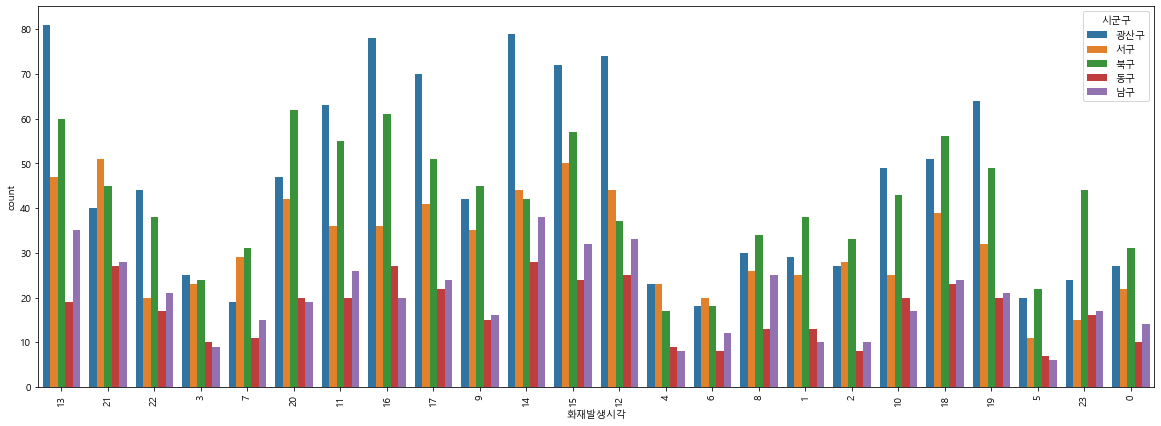

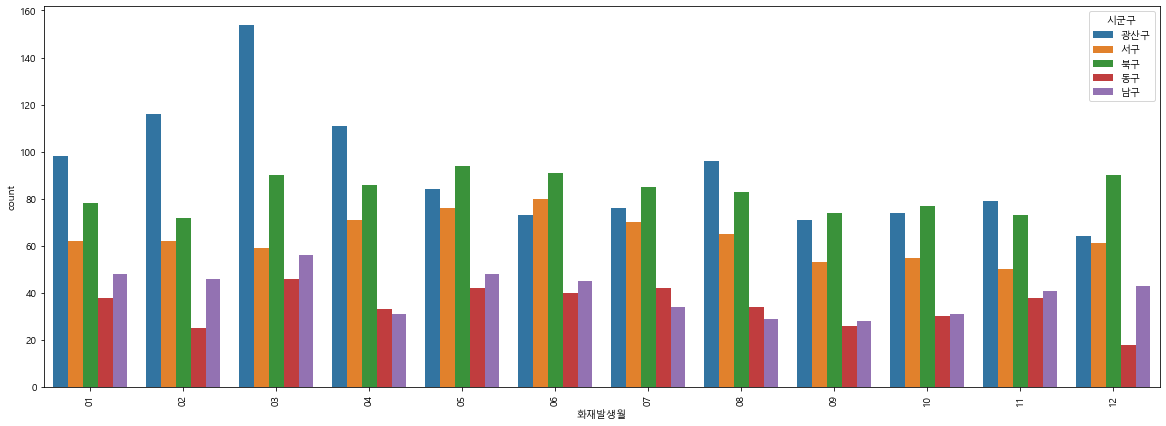

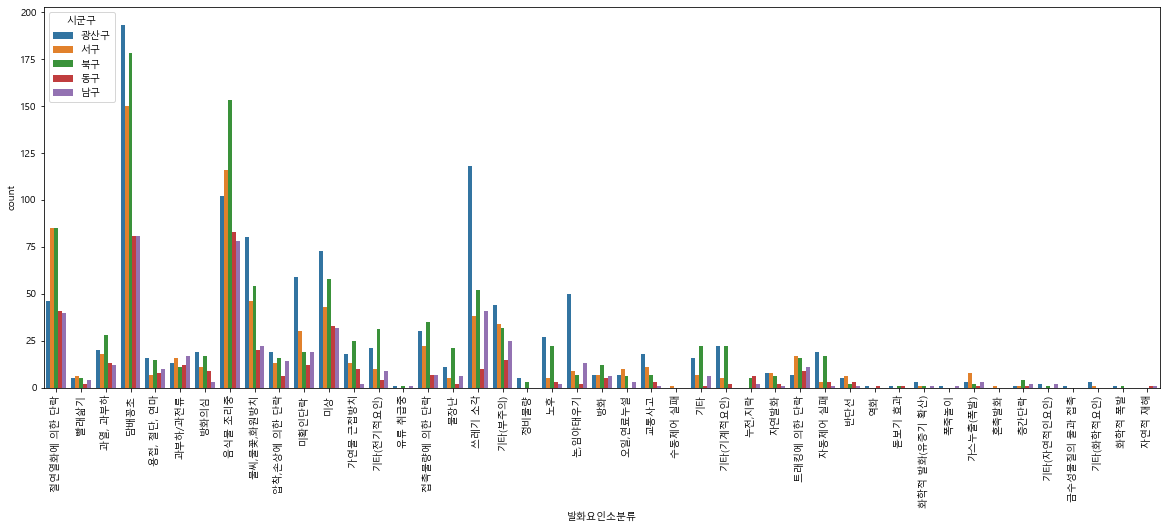

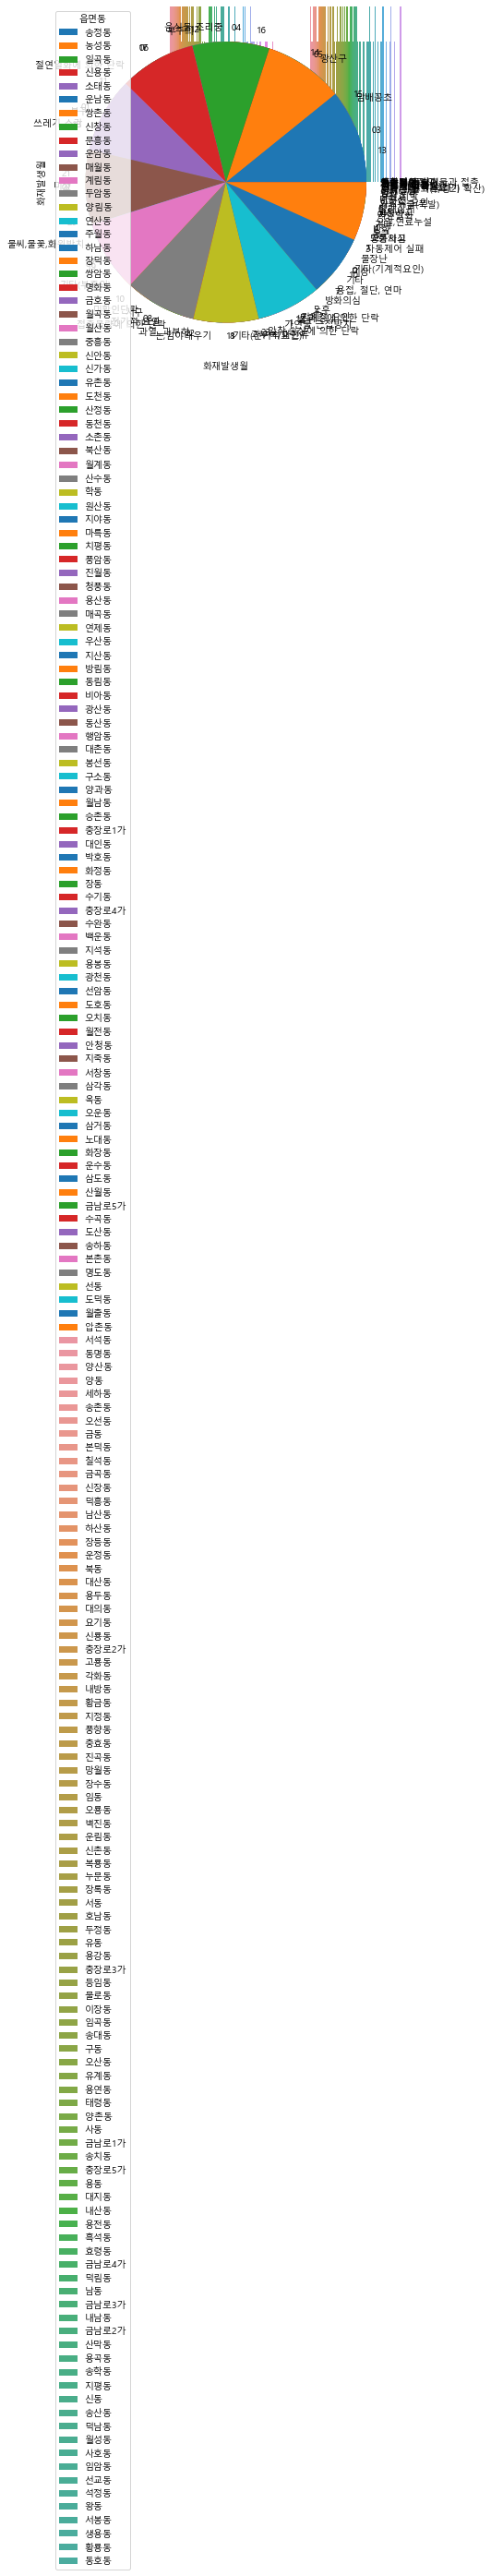

In [4]:
import Risk_level as Rl

In [5]:
def gwlevel():
    moon={}
    yearsumlevel=0
    monlevel = 0
    mon_date = datetime.today().month
    
    for i in range(1,13):
        moon['%02d'%(i)]=temp_df_moon.loc['%02d'%(i),'읍면동'].value_counts()
        yearsumlevel += moon['%02d'%(i)].count()
        if(mon_date==i):
            monlevel= moon['%02d'%(i)].count()
    
    gwrisk = (monlevel/yearsumlevel)*100
    return int(gwrisk)

In [124]:
delisttest = {}
dearr = train[['발화요인대분류']].value_counts()

for i in range(5):
    delisttest[i] = dearr.index[i]
    
print(delisttest[0])

('부주의',)


In [118]:
for i in dearr.keys():
    print(i)

('부주의',)
('전기적 요인',)
('기계적 요인',)
('미상',)
('방화의심',)
('기타',)
('교통사고',)
('화학적 요인',)
('방화',)
('가스누출(폭발)',)
('자연적인 요인',)


In [97]:
vtest = train[['시군구','읍면동','발화요인대분류']].set_index('시군구')
vttt = vtest.loc['서구'].value_counts()
testarray = vttt['금호동']
testarray['부주의']

40

In [125]:
testarray['전기적 요인']

28.0


In [ ]:
testarray['기계적 요인']

In [6]:
train = pd.read_csv('data/fire_train.csv', index_col = 'No') 
test = pd.read_csv('data/fire_test1.csv', index_col = 'No')

In [7]:
train['화재발생시각'] = train['화재발생년월일'].str[11:]
test['화재발생시각'] = test['화재발생년월일'].str[11:]
train['화재발생시각'] = train['화재발생시각'].str[:-3]
test['화재발생시각'] = test['화재발생시각'].str[:-3]

train['화재발생월'] = train['화재발생년월일'].str[5:7]
test['화재발생월'] = test['화재발생년월일'].str[5:7]

#불필요 데이터 삭제
train.drop('화재유형', axis = 1, inplace = True)
test.drop('화재유형', axis = 1, inplace = True)
train.drop('발화열원', axis = 1, inplace = True)
test.drop('발화열원', axis = 1, inplace = True)
train.drop('발화열원소분류', axis = 1, inplace = True)
test.drop('발화열원소분류', axis = 1, inplace = True)
train.drop('최초착화물대분류', axis = 1, inplace = True)
test.drop('최초착화물대분류', axis = 1, inplace = True)
train.drop('인명피해(명)소계', axis = 1, inplace = True)
test.drop('인명피해(명)소계', axis = 1, inplace = True)
train.drop('사망', axis = 1, inplace = True)
test.drop('사망', axis = 1, inplace = True)
train.drop('부상', axis = 1, inplace = True)
test.drop('부상', axis = 1, inplace = True)
train.drop('재산피해소계', axis = 1, inplace = True)
test.drop('재산피해소계', axis = 1, inplace = True)
train.drop('장소대분류', axis = 1, inplace = True)
test.drop('장소대분류', axis = 1, inplace = True)
train.drop('장소소분류', axis = 1, inplace = True)
test.drop('장소소분류', axis = 1, inplace = True)
train.drop('최초착화물소분류', axis = 1, inplace = True)
test.drop('최초착화물소분류', axis = 1, inplace = True)
train.drop('장소중분류', axis = 1, inplace = True)
test.drop('장소중분류', axis = 1, inplace = True)
train.drop('화재발생년월일', axis = 1, inplace = True)
test.drop('화재발생년월일', axis = 1, inplace = True)
train.drop('시도', axis = 1, inplace = True)
test.drop('시도', axis = 1, inplace = True)

In [8]:
head_count = 7
temp_df = train[['화재발생월','발화요인소분류']].set_index('화재발생월')

In [9]:
#1
small01 = temp_df.loc['01','발화요인소분류'].value_counts().head(head_count)
small01.loc['etc'] = (temp_df.loc['01','발화요인소분류'].value_counts().tail(len(temp_df.loc['01','발화요인소분류'].value_counts())-head_count).sum())

#2
small02 = temp_df.loc['02','발화요인소분류'].value_counts().head(head_count)
small02.loc['etc'] = (temp_df.loc['02','발화요인소분류'].value_counts().tail(len(temp_df.loc['02','발화요인소분류'].value_counts())-head_count).sum())

#3
small03 = temp_df.loc['03','발화요인소분류'].value_counts().head(head_count)
small03.loc['etc'] = (temp_df.loc['03','발화요인소분류'].value_counts().tail(len(temp_df.loc['03','발화요인소분류'].value_counts())-head_count).sum())

#4
small04 = temp_df.loc['04','발화요인소분류'].value_counts().head(head_count)
small04.loc['etc'] = (temp_df.loc['04','발화요인소분류'].value_counts().tail(len(temp_df.loc['04','발화요인소분류'].value_counts())-head_count).sum())

#5
small05 = temp_df.loc['05','발화요인소분류'].value_counts().head(head_count)
small05.loc['etc'] = (temp_df.loc['05','발화요인소분류'].value_counts().tail(len(temp_df.loc['05','발화요인소분류'].value_counts())-head_count).sum())

#6
small06 = temp_df.loc['06','발화요인소분류'].value_counts().head(head_count)
small06.loc['etc'] = (temp_df.loc['06','발화요인소분류'].value_counts().tail(len(temp_df.loc['06','발화요인소분류'].value_counts())-head_count).sum())

#7
small07 = temp_df.loc['07','발화요인소분류'].value_counts().head(head_count)
small07.loc['etc'] = (temp_df.loc['07','발화요인소분류'].value_counts().tail(len(temp_df.loc['07','발화요인소분류'].value_counts())-head_count).sum())

#8
small08 = temp_df.loc['08','발화요인소분류'].value_counts().head(head_count)
small08.loc['etc'] = (temp_df.loc['08','발화요인소분류'].value_counts().tail(len(temp_df.loc['08','발화요인소분류'].value_counts())-head_count).sum())

#9
small09 = temp_df.loc['09','발화요인소분류'].value_counts().head(head_count)
small09.loc['etc'] = (temp_df.loc['09','발화요인소분류'].value_counts().tail(len(temp_df.loc['09','발화요인소분류'].value_counts())-head_count).sum())

#10
small10 = temp_df.loc['10','발화요인소분류'].value_counts().head(head_count)
small10.loc['etc'] = (temp_df.loc['10','발화요인소분류'].value_counts().tail(len(temp_df.loc['10','발화요인소분류'].value_counts())-head_count).sum())

#11
small11 = temp_df.loc['11','발화요인소분류'].value_counts().head(head_count)
small11.loc['etc'] = (temp_df.loc['11','발화요인소분류'].value_counts().tail(len(temp_df.loc['11','발화요인소분류'].value_counts())-head_count).sum())

#12
small12 = temp_df.loc['12','발화요인소분류'].value_counts().head(head_count)
small12.loc['etc'] = (temp_df.loc['12','발화요인소분류'].value_counts().tail(len(temp_df.loc['12','발화요인소분류'].value_counts())-head_count).sum())


In [10]:
head_count = 9
temp_df_moon = train[['화재발생월','읍면동']].set_index('화재발생월')

In [11]:
#1
moon01 = temp_df_moon.loc['01','읍면동'].value_counts().head(head_count)
moon01.loc['etc'] = (temp_df_moon.loc['01','읍면동'].value_counts().tail(len(temp_df_moon.loc['01','읍면동'].value_counts())-head_count).sum())

#2
moon02 = temp_df_moon.loc['02','읍면동'].value_counts().head(head_count)
moon02.loc['etc'] = (temp_df_moon.loc['02','읍면동'].value_counts().tail(len(temp_df_moon.loc['02','읍면동'].value_counts())-head_count).sum())

#3
moon03 = temp_df_moon.loc['03','읍면동'].value_counts().head(head_count)
moon03.loc['etc'] = (temp_df_moon.loc['03','읍면동'].value_counts().tail(len(temp_df_moon.loc['03','읍면동'].value_counts())-head_count).sum())

#4
moon04 = temp_df_moon.loc['04','읍면동'].value_counts().head(head_count)
moon04.loc['etc'] = (temp_df_moon.loc['04','읍면동'].value_counts().tail(len(temp_df_moon.loc['04','읍면동'].value_counts())-head_count).sum())

#5
moon05 = temp_df_moon.loc['05','읍면동'].value_counts().head(head_count)
moon05.loc['etc'] = (temp_df_moon.loc['05','읍면동'].value_counts().tail(len(temp_df_moon.loc['05','읍면동'].value_counts())-head_count).sum())

#6
moon06 = temp_df_moon.loc['06','읍면동'].value_counts().head(head_count)
moon06.loc['etc'] = (temp_df_moon.loc['06','읍면동'].value_counts().tail(len(temp_df_moon.loc['06','읍면동'].value_counts())-head_count).sum())

#7
moon07 = temp_df_moon.loc['07','읍면동'].value_counts().head(head_count)
moon07.loc['etc'] = (temp_df_moon.loc['07','읍면동'].value_counts().tail(len(temp_df_moon.loc['07','읍면동'].value_counts())-head_count).sum())

#8
moon08 = temp_df_moon.loc['08','읍면동'].value_counts().head(head_count)
moon08.loc['etc'] = (temp_df_moon.loc['08','읍면동'].value_counts().tail(len(temp_df_moon.loc['08','읍면동'].value_counts())-head_count).sum())

#9
moon09 = temp_df_moon.loc['09','읍면동'].value_counts().head(head_count)
moon09.loc['etc'] = (temp_df_moon.loc['09','읍면동'].value_counts().tail(len(temp_df_moon.loc['09','읍면동'].value_counts())-head_count).sum())

#10
moon10 = temp_df_moon.loc['10','읍면동'].value_counts().head(head_count)
moon10.loc['etc'] = (temp_df_moon.loc['10','읍면동'].value_counts().tail(len(temp_df_moon.loc['10','읍면동'].value_counts())-head_count).sum())

#11
moon11 = temp_df_moon.loc['11','읍면동'].value_counts().head(head_count)
moon11.loc['etc'] = (temp_df_moon.loc['11','읍면동'].value_counts().tail(len(temp_df_moon.loc['11','읍면동'].value_counts())-head_count).sum())

#12
moon12 = temp_df_moon.loc['12','읍면동'].value_counts().head(head_count)
moon12.loc['etc'] = (temp_df_moon.loc['12','읍면동'].value_counts().tail(len(temp_df_moon.loc['12','읍면동'].value_counts())-head_count).sum())


In [12]:
def fullCity(month):
    if(month=='01'):
        return moon01
    elif(month=='02'):
        return moon02
    elif(month=='03'):
        return moon03 
    elif(month=='04'):
        return moon04 
    elif(month=='05'):
        return moon05 
    elif(month=='06'):
        return moon06 
    elif(month=='07'):
        return moon07 
    elif(month=='08'):
        return moon08 
    elif(month=='09'):
        return moon09 
    elif(month=='10'):
        return moon10 
    elif(month=='11'):
        return moon11
    elif(month=='12'):
        return moon12 

def fireMain(month):
    return

def fireElement(month):
    if(month=='01'):
        return small01 
    elif(month=='02'):
        return small02
    elif(month=='03'):
        return small03 
    elif(month=='04'):
        return small04 
    elif(month=='05'):
        return small05 
    elif(month=='06'):
        return small06 
    elif(month=='07'):
        return small07 
    elif(month=='08'):
        return small08 
    elif(month=='09'):
        return small09 
    elif(month=='10'):
        return small10 
    elif(month=='11'):
        return small11 
    elif(month=='12'):
        return small12 
    
def lv(month):
    return

def locLv(addr1, addr2):
    return

In [13]:
data = fireElement('03')
js = data.to_json(orient = 'columns')

resp = Response("{}".format(data), mimetype='application/json')
print(resp)
resp.headers.add('Access-Control-Allow-Origin', '*')
#resp.headers['Access-Control-Allow-Headers'] = 'Origin'
print(resp)

<Response 273 bytes [200 OK]>
<Response 273 bytes [200 OK]>


In [14]:
def fullCity(month):
    head_count = 20
    temp_df_moon = train[['화재발생월','읍면동']].set_index('화재발생월')
    moon = temp_df_moon.loc[month,'읍면동'].value_counts().head(head_count)
    
    return moon

def fireMain(month):
    head_count = 6
    temp_df_fireBig = train[['화재발생월','발화요인대분류']].set_index('화재발생월')
    fireBig = temp_df_fireBig.loc[month,'발화요인대분류'].value_counts().head(head_count)
    fireBig.loc['etc'] = (temp_df_fireBig.loc[month,'발화요인대분류'].value_counts().tail(len(temp_df_fireBig.loc[month,'발화요인대분류'].value_counts())-head_count).sum())
    
    return fireBig

def fireElement(month):
    head_count = 3
    temp_df = train[['화재발생월','발화요인소분류']].set_index('화재발생월')
    smallElement = temp_df.loc[month,'발화요인소분류'].value_counts().head(head_count)
    smallElement.loc['etc'] = (temp_df.loc[month,'발화요인소분류'].value_counts().tail(len(temp_df.loc[month,'발화요인소분류'].value_counts())-head_count).sum())

    return smallElement

def risk_level_loc_city(mon, loc):
    temp_df = train[['화재발생월','읍면동']].set_index('화재발생월')
    testmoon = temp_df.loc[mon, loc].value_counts()
    return testmoon

def risk_level_loc_null(mon, loc):
    temp_df = train[['화재발생월','읍면동']].set_index('화재발생월')
    testmoon = temp_df.loc[mon, loc].value_counts()
    return testmoon

In [15]:
# 간단한 Flask 서버

app = flask.Flask(__name__)

#검색시 검색한 구, 동에 대한 정보
@app.route("/", methods=['GET', 'POST'])
def index():
    # 자바에서 값 받아오기
    parameter_dict = request.args.to_dict()
    address1 = parameter_dict["1"]# 구
    address2 = parameter_dict["2"]# 동
    
    # 위험도
    rlsum = 0
    for i in range(5):
        rlsum += Rl.risk_level(datetime.today().month)[i]
    rllevel= (Rl.risk_level(datetime.today().month)[address1]/rlsum)*100
    risk = int(rllevel)
    risk
    
    ehdcount=temp_df_moon.loc['%02d'%(datetime.today().month),'읍면동'].value_counts()
    fincouehd = int(ehdcount[address2])
    fincouehd
    
    
    #fix값 변환
    adds = {"a":address1,"b":address2,"c":risk,"d":fincouehd}
    # my_res = flask.Response(adds)
    test_res = jsonify(adds)
    
    # Access-Control-Allow-Origin추가: '*'는 모든 사이트를 추가한다는 뜻.
    #my_res.headers["Access-Control-Allow-Origin"] = "*"
    test_res.headers["Access-Control-Allow-Origin"] = "*"
    
    ## 특정 사이트를 추가하려면 아래처럼 * 대신 넣으면 됨
    # my_res.headers["Access-Control-Allow-Origin"] = 'https://www.coding-groot.tistory.com/'
    
    # 결과 전송
    # return my_res
    return test_res

#광주 화재 위험도 레벨
@app.route("/risk-level", methods=['GET', 'POST'])
def gwlevel():
    moon={}
    yearsumlevel=0
    monlevel = 0
    mon_date = datetime.today().month
    
    for i in range(1,13):
        moon['%02d'%(i)]=temp_df_moon.loc['%02d'%(i),'읍면동'].value_counts()
        yearsumlevel += moon['%02d'%(i)].count()
        if(mon_date==i):
            monlevel= moon['%02d'%(i)].count()
    
    gwrisk = (monlevel/yearsumlevel)*100
    
    res = jsonify(int(gwrisk))
    res.headers["Access-Control-Allow-Origin"] = "*"
    
    print(res)
    return res

# 해당 월에 가장 높은 화재를 보였던 시/군/구 or 동
@app.route("/learning-fullcity", methods=['GET', 'POST'])
def learingFullcity():
    parameter_dict = request.args.to_dict()
    month = parameter_dict["1"]
    
    data = fullCity(month)
    js = data.to_json(orient = 'columns')
    resp = Response("{}".format(js), mimetype='application/json')
    resp.headers.add('Access-Control-Allow-Origin', '*')
    
    return resp

# 해당 월에 가장 높은 화재요인 대분류
@app.route("/learning-fireMain", methods=['GET', 'POST'])
def learingFireMain():
    parameter_dict = request.args.to_dict()
    month = parameter_dict["1"]
    
    data = fireMain(month)
    js = data.to_json(orient = 'columns')
    resp = Response("{}".format(js), mimetype='application/json')
    resp.headers.add('Access-Control-Allow-Origin', '*')
    
    return resp

# 해당 월에 가장 높은 화재요인 소분류
@app.route("/learning-fireElement", methods=['GET', 'POST'])
def learingFireElement():
    parameter_dict = request.args.to_dict()
    month = parameter_dict["1"]
    
    data = fireElement(month)
    js = data.to_json(orient = 'columns')
    resp = Response("{}".format(js), mimetype='application/json')
    resp.headers.add('Access-Control-Allow-Origin', '*')
    
    return resp

@app.route("/learning-locLv", methods=['GET', 'POST'])
def learingLocLv():
    moon={}
    yearsumlevel=0
    monlevel = 0
    mon_date = datetime.today().month+1
    
    for i in range(1,13):
        moon['%02d'%(i)]=temp_df_moon.loc['%02d'%(i),'읍면동'].value_counts()
        yearsumlevel += moon['%02d'%(i)].count()
        if(mon_date==i):
            monlevel= moon['%02d'%(i)].count()
    
    gwrisk = (monlevel/yearsumlevel)*100
    
    res = jsonify(int(gwrisk))
    res.headers["Access-Control-Allow-Origin"] = "*"
    
    print(res)
    return res

 
if __name__ == "__main__" : # .py 파일에서 main함수 역할
    app.run(host="localhost", port="9000")

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://localhost:9000/ (Press CTRL+C to quit)
